In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: ML047_Kaung Khant Kyaw


(300, 300)


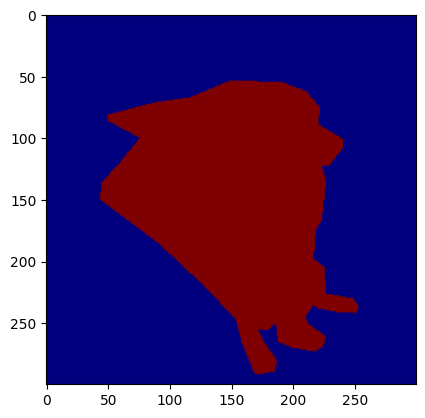

In [2]:
import numpy as np
import matplotlib.pyplot as plt
npy_path = f"./data_dataset_voc/SegmentationClassNpy/{ML_Summer_School_ID}.npy"

# Load the segmentation mask
mask = np.load(npy_path)  # shape: (H, W)
print(mask.shape)
plt.imshow(mask,cmap='jet')


(300, 300, 3)


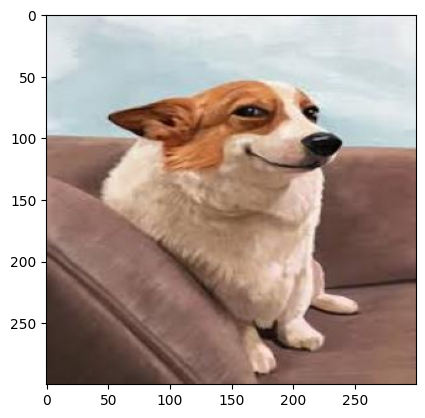

In [3]:
import imgviz
import cv2

# Load original image (from JPEGImages/)
img_path = f"./data_dataset_voc/JPEGImages/{ML_Summer_School_ID}.jpg"

class_path = f"./data_dataset_voc/class_names.txt"

with open(class_path) as f:
    class_names = [line.strip() for line in f.readlines()]


img = cv2.imread(img_path)

if img is None:
    print("Image not found:", img_path)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)



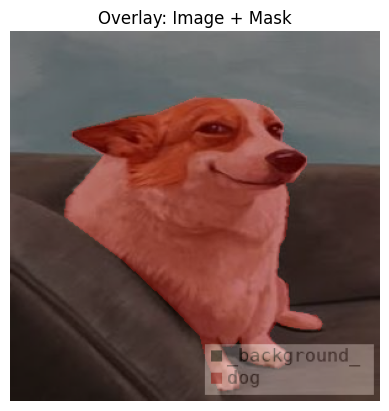

In [4]:
# Create a color version of the mask
mask_color = imgviz.label2rgb(label=mask, label_names=class_names, font_size=15)

# Blend original image with mask color
overlay = (0.5 * img + 0.5 * mask_color).astype(np.uint8)

plt.imshow(overlay)
plt.title("Overlay: Image + Mask")
plt.axis("off")
plt.show()